In [229]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [230]:
data = pd.read_csv("term-deposit-marketing-2020.csv")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


### Data Analysis
Checking null values and dtypes

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [232]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


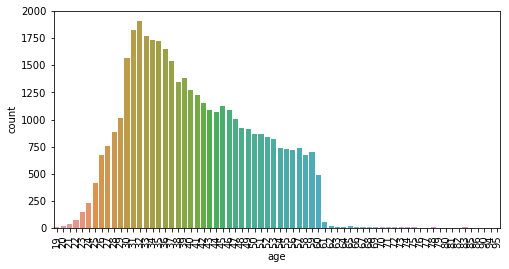

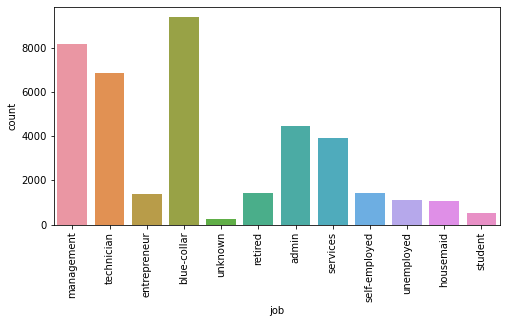

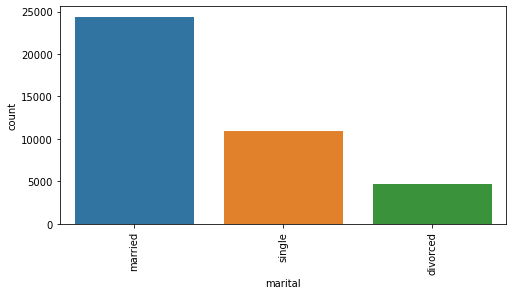

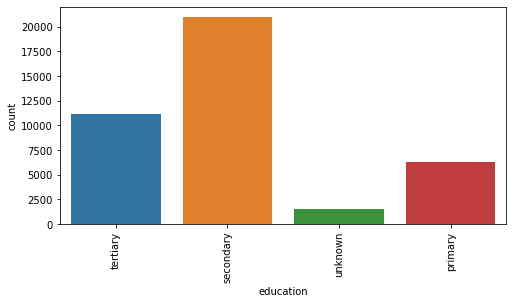

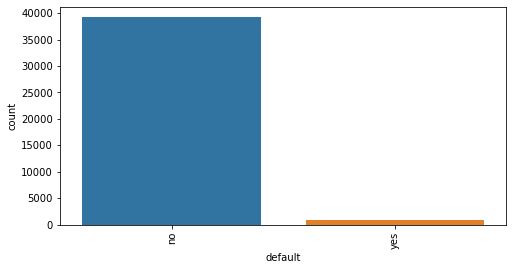

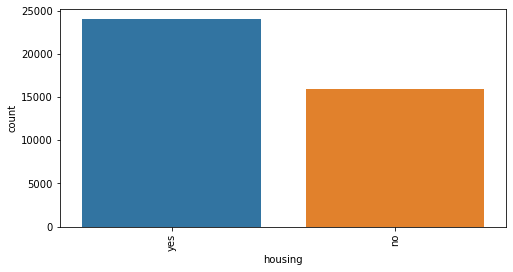

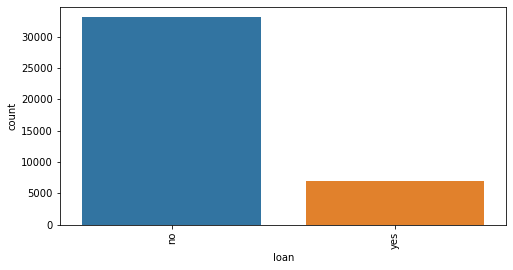

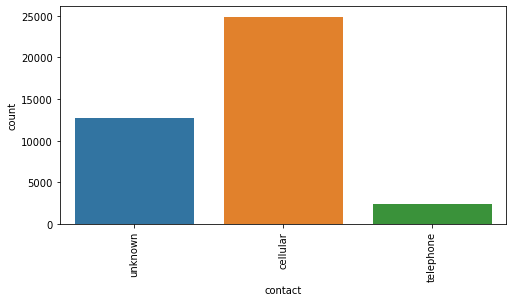

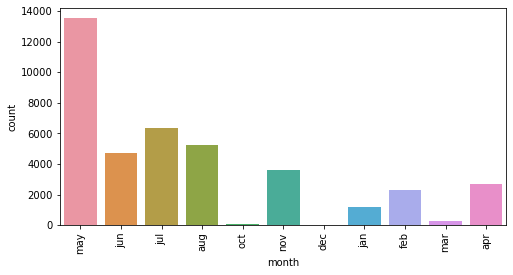

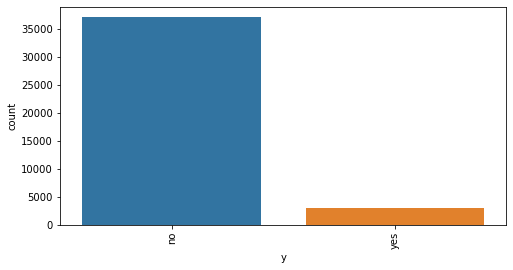

In [233]:
c_list = ["age","job","marital","education","default","housing","loan","contact","month","y"]
for i in c_list:
    plt.figure(figsize=(8, 4))
    sns.countplot(i, data=data)
    plt.xticks(rotation=90)
    plt.show()

In [234]:
y = LabelEncoder().fit_transform(data.y)
data.month = LabelEncoder().fit_transform(data.month)
data.contact = LabelEncoder().fit_transform(data.contact)

In [235]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,2,5,8,261,1,no
1,44,technician,single,secondary,no,29,yes,no,2,5,8,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,2,5,8,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,2,5,8,92,1,no
4,33,unknown,single,unknown,no,1,no,no,2,5,8,198,1,no


In [236]:
obj_columns = data.select_dtypes(include=['object'])
for i in obj_columns.columns:
    print(data[i].value_counts())

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64
married     24386
single      10889
divorced     4725
Name: marital, dtype: int64
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64
no     39191
yes      809
Name: default, dtype: int64
yes    24031
no     15969
Name: housing, dtype: int64
no     33070
yes     6930
Name: loan, dtype: int64
no     37104
yes     2896
Name: y, dtype: int64


### Label Encoding

In [237]:
columns= ['loan','housing','default','y']
for i in columns:
    data[i] = LabelEncoder().fit_transform(data[i])

In [238]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,2,5,8,261,1,0
1,44,technician,single,secondary,0,29,1,0,2,5,8,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,2,5,8,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,2,5,8,92,1,0
4,33,unknown,single,unknown,0,1,0,0,2,5,8,198,1,0


In [239]:
col_obj = data.select_dtypes(include=['object'])
col_num = data.select_dtypes(exclude=['object'])
col_obj

,job,marital,education
0,management,married,tertiary
1,technician,single,secondary
2,entrepreneur,married,secondary
3,blue-collar,married,unknown
4,unknown,single,unknown
...,...,...,...
39995,technician,married,tertiary
39996,management,single,tertiary
39997,admin,divorced,secondary
39998,management,married,tertiary


In [240]:
col_num

,age,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,0,2143,1,0,2,5,8,261,1,0
1,44,0,29,1,0,2,5,8,151,1,0
2,33,0,2,1,1,2,5,8,76,1,0
3,47,0,1506,1,0,2,5,8,92,1,0
4,33,0,1,0,0,2,5,8,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...
39995,53,0,395,0,0,0,3,6,107,1,0
39996,30,0,3340,0,0,0,3,6,238,3,1
39997,54,0,200,0,0,0,3,6,170,1,1
39998,34,0,1047,0,0,0,3,6,342,1,0


### One Hot Encoding

In [241]:
objs = pd.get_dummies(col_obj, columns=col_obj.columns)
objs

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
39996,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
39997,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
39998,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [242]:
df = pd.concat([objs, col_num], axis=1,sort=False)

In [243]:
df

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,0,0,0,0,1,0,0,0,0,0,...,0,2143,1,0,2,5,8,261,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,29,1,0,2,5,8,151,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,2,1,1,2,5,8,76,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1506,1,0,2,5,8,92,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,5,8,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,1,...,0,395,0,0,0,3,6,107,1,0
39996,0,0,0,0,1,0,0,0,0,0,...,0,3340,0,0,0,3,6,238,3,1
39997,1,0,0,0,0,0,0,0,0,0,...,0,200,0,0,0,3,6,170,1,1
39998,0,0,0,0,1,0,0,0,0,0,...,0,1047,0,0,0,3,6,342,1,0


In [244]:
y = df.iloc[:,-1:]
x = df.iloc[:,:-1]

# Feature Importances

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
X_reduced_names = df.corr().abs()["y"].nlargest(20).index
print(df[X_reduced_names].corr().abs()["y"])

y                      1.000000
duration               0.461169
contact                0.089626
marital_married        0.056863
housing                0.054336
marital_single         0.051721
education_tertiary     0.046763
month                  0.046141
campaign               0.040350
job_student            0.037384
job_blue-collar        0.032859
loan                   0.031029
balance                0.030232
education_primary      0.026786
job_retired            0.024343
job_management         0.020291
age                    0.020273
education_secondary    0.019683
job_housemaid          0.015248
job_services           0.014645
Name: y, dtype: float64


<AxesSubplot:>

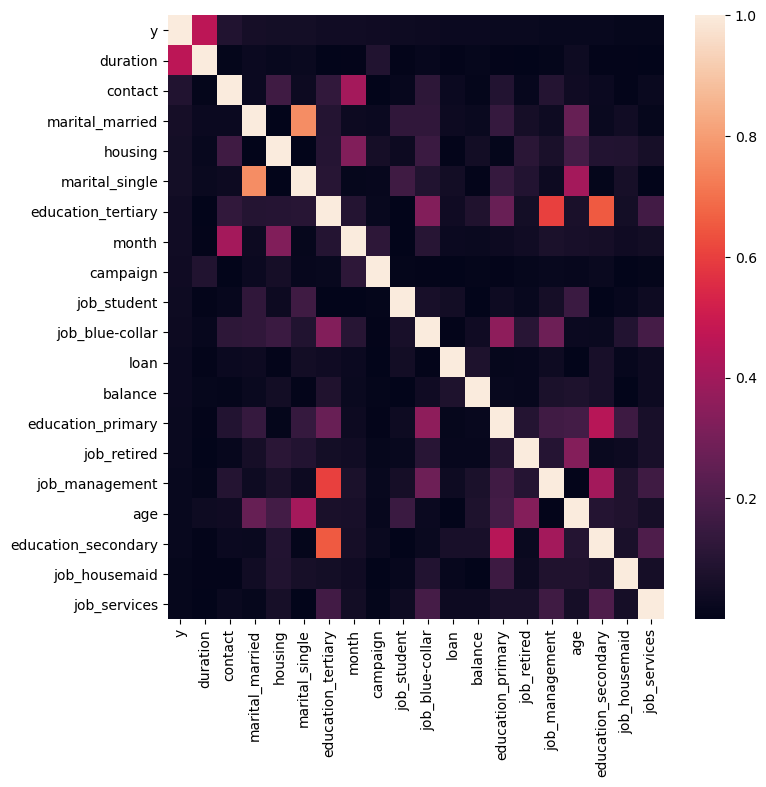

In [246]:
plt.figure(figsize=(8, 8), dpi=100)
sns.heatmap(df[X_reduced_names].corr().abs(), annot=False)

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('NB',GaussianNB()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('XGB',xgb.XGBClassifier()))

In [248]:
results=[]
scores=[]
for name,model in models:
    scores = cross_val_score(model, x, y, cv=5)
    print(name,"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    results.append((name,scores.mean()))

LR Accuracy: 0.93 (+/- 0.02)
KNN Accuracy: 0.93 (+/- 0.01)
RF Accuracy: 0.74 (+/- 0.35)
GBC Accuracy: 0.68 (+/- 0.58)
ABC Accuracy: 0.74 (+/- 0.45)
NB Accuracy: 0.89 (+/- 0.06)
DTC Accuracy: 0.41 (+/- 0.37)
XGB Accuracy: 0.61 (+/- 0.46)


In [249]:
results

[('LR', 0.927825),
 ('KNN', 0.9254749999999999),
 ('RF', 0.74025),
 ('GBC', 0.6804),
 ('ABC', 0.74495),
 ('NB', 0.89175),
 ('DTC', 0.40625),
 ('XGB', 0.6095)]

#### Parameter tuning for best models

In [250]:
params = {'max_iter': [100,200,250,500],
         'C':[1, 10]}

logr = LogisticRegression()

logr_grid = GridSearchCV(logr, params,  cv = 5, n_jobs=-1, verbose=1)
logr_grid.fit(x, y)
print('Best Estimator:', logr_grid.best_estimator_,'\n'+'Best Score:', logr_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   19.6s finished


Best Estimator: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
Best Score: 0.92795


In [251]:
knn = KNeighborsClassifier()
params = {'n_neighbors':[5,50,100,200,250],
         'p':[1,2]}
knn_grid = GridSearchCV(knn, params, cv=5,n_jobs=-1,verbose=1)
knn_grid.fit(x,y)

print('Best model:', knn_grid.best_estimator_.get_params())
knn_grid.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.0s finished


Best model: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 100, 'p': 2, 'weights': 'uniform'}


0.9310750000000001